In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager  

In [3]:
df_sup_train = pd.read_csv("results/run-R179_MMNet_D+RGB+NORM-BN-v8-NYU-Alp-0-Int-7-tag-mIoU_train.csv")
df_sup_valid = pd.read_csv("results/run-R179_MMNet_D+RGB+NORM-BN-v8-NYU-Alp-0-Int-7-tag-mIoU_valid.csv")
df_ssup_train = pd.read_csv("results/run-R172_MMNet_D+RGB+NORM-BN-v8-NYU-Alp-0.6-Int-5-tag-mIoU_train.csv")
df_ssup_valid = pd.read_csv("results/run-R172_MMNet_D+RGB+NORM-BN-v8-NYU-Alp-0.6-Int-5-tag-mIoU_valid.csv")

df_sup_train['Value'] *= 100
df_sup_valid['Value'] *= 100
df_ssup_train['Value'] *= 100
df_ssup_valid['Value'] *= 100

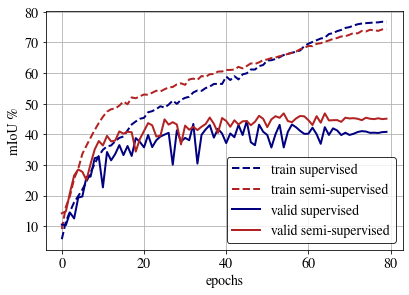

In [5]:
#plt.style.use(u'seaborn-whitegrid')
fig = plt.figure()
plt.rc('font', family='FreeSerif', size=14)
plt.rc('figure', figsize= [6.4, 4.4])
y_ticks = np.arange(0,100,10)
ax = fig.add_subplot(1, 1, 1)
ax.set_yticks(y_ticks)

plt.plot( 'Step', 'Value', data=df_sup_train, marker='',  color='navy', linewidth=2, linestyle='dashed', label="train supervised")
plt.plot( 'Step', 'Value', data=df_ssup_train, marker='', color='firebrick', linewidth=2,  linestyle='dashed', label="train semi-supervised")
plt.plot( 'Step', 'Value', data=df_sup_valid, marker='',  color='navy', linewidth=2, label="valid supervised")
plt.plot( 'Step', 'Value', data=df_ssup_valid, marker='', color='firebrick', linewidth=2,  label="valid semi-supervised")
legend = plt.legend(edgecolor="black")
plt.grid(b=None, which='major', axis='both')
plt.xlabel('epochs')
plt.ylabel('mIoU %')
#legend.get_frame().set_alpha(None)
#legend.get_frame().set_facecolor((0, 0, 1, 0.1))
plt.savefig('paper/graph_overfitting.pdf',bbox_inches = 'tight')
plt.show()


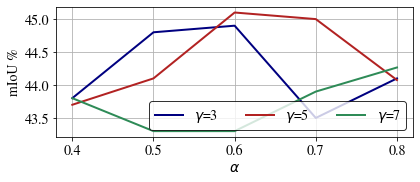

In [7]:
df_semi_sup = pd.read_csv("results/hyper_param.csv")
colors=['navy', 'firebrick', 'seagreen']

#ax = fig.add_subplot(1, 1, 1)
#plt.rc('text', usetex=True)
plt.rc('font', family='FreeSerif', size=14)
plt.rc('font', family='FreeSerif', size=14)
plt.rc('figure', figsize= [6.4, 2.4])
x_ticks = np.array([0.4,0.5,0.6,0.7,0.8])
y_ticks = np.array([43,43.5, 44,44.5, 45])
plt.xlabel(r'$\alpha$')
plt.ylabel('mIoU %')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid(b=None, which='major', axis='both')

# And a corresponding grid
ax.grid(which='both')

for color, interval in zip(colors, np.unique(df_semi_sup['interval'])):
    plt.plot( 'alpha', 'miou', data=df_semi_sup[df_semi_sup['interval']==interval], marker='',  color=color, linewidth=2, label=r"$\gamma$={}".format(interval))

legend = plt.legend(edgecolor="black",loc="lower right", ncol=3)
#plt.grid(b=None, which='major', axis='both')
#legend.get_frame().set_alpha(None)
#legend.get_frame().set_facecolor((0, 0, 1, 0.1))
plt.savefig('paper/graph_hyper_param.pdf',bbox_inches = 'tight')
plt.show()


# Suplementary Material

## 2D Network Training

In [14]:
df_2D_single_train = pd.read_csv("results/run-R8_RefineNet_FINE_NYU_CN11-tag-mIoU_train.csv")
df_2D_single_valid = pd.read_csv("results/run-R8_RefineNet_FINE_NYU_CN11-tag-mIoU_valid.csv")
df_2D_bi_train = pd.read_csv("results/run-R89_BiModalRDFNetLW_RGB-NORMALS-FINE-tag-mIoU_train.csv")
df_2D_bi_valid = pd.read_csv("results/run-R89_BiModalRDFNetLW_RGB-NORMALS-FINE-tag-mIoU_valid.csv")


df_2D_single_train = df_2D_single_train[df_2D_single_train['Step']<150]
df_2D_single_valid = df_2D_single_valid[df_2D_single_valid['Step']<150]

df_2D_single_train['Value'] *= 100
df_2D_single_valid['Value'] *= 100
df_2D_bi_train['Value'] *= 100
df_2D_bi_valid['Value'] *= 100

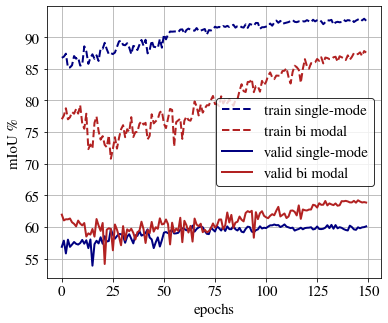

In [18]:
#plt.style.use(u'seaborn-whitegrid')
fig = plt.figure()
plt.rc('font', family='FreeSerif', size=15)
plt.rc('figure', figsize= [6, 5])
y_ticks = np.arange(0,100,5)
ax = fig.add_subplot(1, 1, 1)
ax.set_yticks(y_ticks)

plt.plot( 'Step', 'Value', data=df_2D_single_train, marker='',  color='navy', linewidth=2, linestyle='dashed', label="train single-mode")
plt.plot( 'Step', 'Value', data=df_2D_bi_train, marker='', color='firebrick', linewidth=2,  linestyle='dashed', label="train bi modal")
plt.plot( 'Step', 'Value', data=df_2D_single_valid, marker='',  color='navy', linewidth=2, label="valid single-mode")
plt.plot( 'Step', 'Value', data=df_2D_bi_valid, marker='', color='firebrick', linewidth=2,  label="valid bi modal")
legend = plt.legend(edgecolor="black")
plt.grid(b=None, which='major', axis='both')
plt.xlabel('epochs')
plt.ylabel('mIoU %')
#legend.get_frame().set_alpha(None)
#legend.get_frame().set_facecolor((0, 0, 1, 0.1))
plt.savefig('paper/2D_training.pdf',bbox_inches = 'tight')
plt.show()

# DA vs NO DA

In [6]:
df_no_da_train = pd.read_csv("results/run-R321_MMNet_SUPERV-NYU-depth+rgb+normals-tag-mIoU_train.csv")
df_no_da_valid = pd.read_csv("results/run-R321_MMNet_SUPERV-NYU-depth+rgb+normals-tag-mIoU_valid.csv")
df_da_train = pd.read_csv("results/run-R336_MMNet_SUPERV-NYU-depth+rgb+normals_da-tag-mIoU_train.csv")
df_da_valid = pd.read_csv("results/run-R336_MMNet_SUPERV-NYU-depth+rgb+normals_da-tag-mIoU_valid.csv")


df_no_da_train['Value'] *= 100
df_no_da_valid['Value'] *= 100
df_da_train['Value'] *= 100
df_da_valid['Value'] *= 100

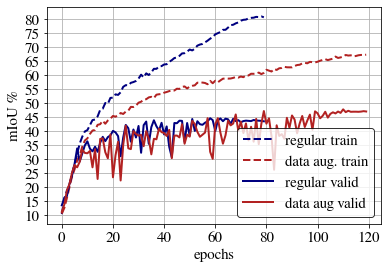

In [7]:
#plt.style.use(u'seaborn-whitegrid')
fig = plt.figure()
plt.rc('font', family='FreeSerif', size=15)
plt.rc('figure', figsize= [6, 5])
y_ticks = np.arange(0,100,5)
ax = fig.add_subplot(1, 1, 1)
ax.set_yticks(y_ticks)

plt.plot( 'Step', 'Value', data=df_no_da_train, marker='',  color='navy', linewidth=2, linestyle='dashed', label="regular train")
plt.plot( 'Step', 'Value', data=df_da_train, marker='', color='firebrick', linewidth=2,  linestyle='dashed', label="data aug. train")
plt.plot( 'Step', 'Value', data=df_no_da_valid, marker='',  color='navy', linewidth=2, label="regular valid")
plt.plot( 'Step', 'Value', data=df_da_valid, marker='', color='firebrick', linewidth=2,  label="data aug valid")
legend = plt.legend(edgecolor="black")
plt.grid(b=None, which='major', axis='both')
plt.xlabel('epochs')
plt.ylabel('mIoU %')
#legend.get_frame().set_alpha(None)
#legend.get_frame().set_facecolor((0, 0, 1, 0.1))
plt.savefig('paper/da_training.pdf',bbox_inches = 'tight')
plt.show()